# Assingment 5

**Piyush Chawla**

## TwoDimHard

This section analyses the **TwoDimHard** dataset. The dataset contains the ground truth values (labels) so the analysis becomes easier than 'strict' unsupervised clustering.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import random
from scipy.spatial.distance import euclidean
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import homogeneity_score, v_measure_score, completeness_score
from sklearn.metrics import silhouette_score
data = pd.read_csv('TwoDimHard.csv')

The functions below are the python implementation of k-means algorithm. **kmeans()** take the dataset and cluster number as the input and returns the cluster labels and final means obtained upon the full execution of k-means algorithm. **itr()** is an untility function which computes one iteration of the k-means (i.e. new means and new cluster labels). It can be seen that there is an infinit loop in the kmeans algorithm. The stopping criterion is same label assingment in two consecutive iterations. Other alternative could be same means, which essentially is the exact same condition.

In [86]:
def itr(data,means,k):
    clss = []
    for i in range(len(data)):
        clss.append(-1)
        temp = 10000
        for j in range(len(means)):
            if euclidean(data[i],means[j]) < temp:
                temp = euclidean(data[i],means[j])
                clss[i] = j+1
    means = np.zeros((k,data.shape[1]))
    counts = [0]*k
    for i in range(len(clss)):
        means[clss[i]-1] = np.add(means[clss[i]-1],data[i])
        counts[clss[i]-1]+=1
    for i in range(k):
        means[i] = means[i]/counts[i]
    return clss,means

def _kmeans(data,k):
    indx = random.sample(range(len(data)),k)
    means = []
    clss = [-1]*len(data)
    for i in indx:
        means.append(data[i])
    means = np.array(means)
    
    while True:
        _clss,_means = itr(data,means,k)
        if clss==_clss:
            break
        clss = _clss
        means = _means
        
    return range(len(data)),clss

The function **colors()** below plots clusters in 'TwoDimHard' dataset. It can be noticed that this function has been hard coded to handle only two dimensions. So will skip its use in the later part of the assignment.

In [5]:
colors = ['red','blue','green','yellow','orange']
def plot(data,clss,k):
    _plot = []
    for i in range(k+1):
        _plot.append([])
    for i in range(len(data)):
        _plot[clss[i]].append(data[i])
    for i in range(0,k+1):
        if len(_plot[i])==0:
            continue
        _plot[i] = np.array(_plot[i])
        plt.scatter(_plot[i][:,0],_plot[i][:,1],c = colors[i])
    plt.show()
    

The function **CohSep()** computes sum of the cohession and seperation metrics for the computed clusters.

In [22]:
def CohSep(data,clss,k):
    div = []
    for i in range(k):
        div.append([])
    for i in range(len(clss)):
        div[clss[i]].append(data[i])
    means = []
    for i in range(k):
        means.append( np.mean(np.array(div[i]),axis=0))
    
    sse = []
    ssb = 0
    center = np.mean(np.array(means),axis=0)
    for i in range(k):
        temp = 0
        for j in div[i]:
            temp+=euclidean(means[i],j)**2
        sse.append(temp)
        ssb+=len(div[i])*euclidean(center,means[i])**2
    for i in range(len(sse)):
        print('cluster ',i+1,'SSE',sse[i])
    print('Total SSE',np.sum(sse))
    print('SSB',ssb)
    print('SSE+SSB',np.sum(sse)+ssb)

Function **conf()** is computes the cross tabulation matrix

In [64]:
def conf(pred,true):
    labs = max(len(set(pred)),len(set(true)))
    out = np.zeros((labs,labs))
    for i in range(len(pred)):
        out[pred[i]-1][true[i]-1]+=1
    return out

### A

In [36]:
CohSep(np.array(data[['X.1','X.2']]),data['cluster']-1,4)
print(silhouette_score(data[['X.1','X.2']], data['cluster'], metric='euclidean'))

cluster  1 SSE 0.31284771797726363
cluster  2 SSE 0.9025336156215499
cluster  3 SSE 2.4301187182254433
cluster  4 SSE 1.910715466347143
Total SSE 5.5562155181714
SSB 23.863790948578302
SSE+SSB 29.4200064667497
0.5131434546491092


The code below runs k-means on the dataset assuming that there are 4 clusters.

In [87]:
_id, clss = _kmeans(np.array(data[['X.1','X.2']]),4)

#### 1

In [88]:
CohSep(np.array(data[['X.1','X.2']]),np.array(clss)-1,4)
#print(silhouette_score(data[['X.1','X.2']], clss, metric='euclidean'))

cluster  1 SSE 1.0764850881678978
cluster  2 SSE 1.8446030116907746
cluster  3 SSE 0.5004805751481358
cluster  4 SSE 1.4705341945503394
Total SSE 4.892102869557148
SSB 24.46052077370296
SSE+SSB 29.35262364326011


#### 2
The code below plots both the original clustering classes and the ones computed by the **kmeans()** function.

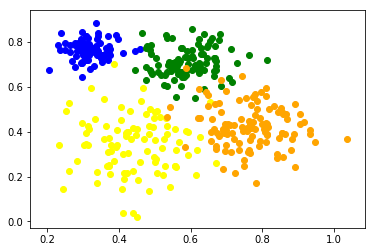

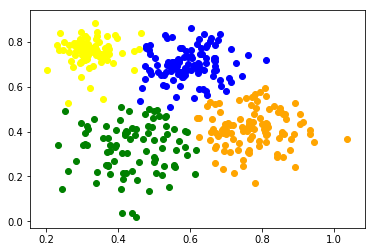

In [89]:
plot(np.array(data[['X.1','X.2']]),np.array(data['cluster']),4)
plot(np.array(data[['X.1','X.2']]),clss,4)

3.

In [91]:
mat = conf(clss,list(data['cluster']))
print(mat)

[[  0.  98.   2.   8.]
 [  0.   0.  88.   2.]
 [ 89.   2.   4.   0.]
 [  0.   0.   3. 104.]]


In [27]:
#print('accuracy =',np.mean(np.max(mat,axis=0)/np.sum(mat,axis=0)))
#print(homogeneity_score(list(data['cluster']),clss))
#print(homogeneity_score(clss,list(data['cluster'])))

### B

#### 1.

In [92]:
_id, clss = _kmeans(np.array(data[['X.1','X.2']]),3)
CohSep(np.array(data[['X.1','X.2']]),np.array(clss)-1,3)

cluster  1 SSE 2.0394799655440696
cluster  2 SSE 1.9594008356114225
cluster  3 SSE 4.5657940415420155
Total SSE 8.564674842697507
SSB 21.879467417713485
SSE+SSB 30.44414226041099


#### 2

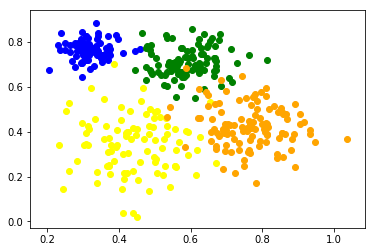

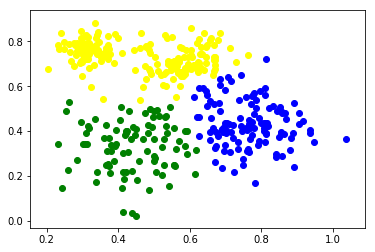

In [93]:
plot(np.array(data[['X.1','X.2']]),np.array(data['cluster']),4)
plot(np.array(data[['X.1','X.2']]),clss,3)

#### 3

In [98]:
mat = conf(clss,list(data['cluster']))
print(mat)

[[  0.   6.   3. 110.]
 [  0.   0.  89.   3.]
 [ 89.  94.   5.   1.]
 [  0.   0.   0.   0.]]


## Wine Dataset

In [99]:
from sklearn.preprocessing import normalize
wine = pd.read_csv('winequality-red.csv',sep=';')
wine.iloc[0]
tmp = []

for i in range(len(wine)):
    if wine['quality'].iloc[i]<= 5:
        tmp.append(0)
    else:
        tmp.append(1)
wine['quality'] = tmp

for i in list(wine.keys()):
    if i == 'quality':
        continue
    else:
        wine[i] = normalize(np.array(wine[i]).reshape(1, -1))[0]

cohsep

In [100]:
CohSep(np.array(wine)[:,:-1],wine['quality'],2)
print(silhouette_score(np.array(wine)[:,:-1], wine['quality'], metric='euclidean'))

cluster  1 SSE 0.8376862159405079
cluster  2 SSE 0.7726100698813582
Total SSE 1.6102962858218661
SSB 0.046597875607361276
SSE+SSB 1.6568941614292274
0.037661006051162654


### K-Means

In [101]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.array(wine)[:,:-1])
clustering = AgglomerativeClustering().fit(np.array(wine)[:,:-1])
#np.sum(clustering.labels_)

In [102]:
CohSep(np.array(wine)[:,:-1],kmeans.labels_,2)
print(silhouette_score(np.array(wine)[:,:-1], kmeans.labels_, metric='euclidean'))

cluster  1 SSE 0.5729951815763623
cluster  2 SSE 0.711931583512176
Total SSE 1.2849267650885383
SSB 0.41551799326142413
SSE+SSB 1.7004447583499624
0.2660740880763293


In [103]:
mat = conf(list(wine['quality']+1),clustering.labels_+1)
print(mat)
print()
print('accuracy =',np.mean(np.max(mat,axis=0)/np.sum(mat,axis=0)))
CohSep(np.array(wine)[:,:-1],clustering.labels_,2)
print(homogeneity_score(wine['quality'],list(clustering.labels_+1)))

[[437. 307.]
 [598. 257.]]

accuracy = 0.5610520094562648
cluster  1 SSE 0.7636142974267357
cluster  2 SSE 0.5477515842132666
Total SSE 1.3113658816400022
SSB 0.37811051104430693
SSE+SSB 1.689476392684309
0.009901996955042262


### Aglomerative Clustering

In [104]:
mat = conf(list(wine['quality']+1),kmeans.labels_+1)
print(mat)
print()
print('accuracy =',np.mean(np.max(mat,axis=0)/np.sum(mat,axis=0)))
CohSep(np.array(wine)[:,:-1],kmeans.labels_,2)
print(homogeneity_score(wine['quality'],kmeans.labels_))

[[299. 445.]
 [241. 614.]]

accuracy = 0.5667479802748925
cluster  1 SSE 0.5729951815763623
cluster  2 SSE 0.711931583512176
Total SSE 1.2849267650885383
SSB 0.41551799326142413
SSE+SSB 1.7004447583499624
0.011596094863664173


### Gaussian Mixture

In [105]:
from sklearn.mixture import GaussianMixture
mix = GaussianMixture(n_components=2).fit(np.array(wine)[:,:-1])
mat = conf(mix.fit_predict(np.array(wine)[:,:-1])+1,wine['quality'])
print(mat)
print()
print('accuracy =',np.mean(np.max(mat,axis=0)/np.sum(mat,axis=0)))
print(homogeneity_score(wine['quality'],mix.fit_predict(np.array(wine)[:,:-1])))

[[293. 360.]
 [562. 384.]]

accuracy = 0.5867194868892662
0.016131570937334486


In [106]:
CohSep(np.array(wine)[:,:-1],mix.fit_predict(np.array(wine)[:,:-1]),2)

cluster  1 SSE 0.7124401776802265
cluster  2 SSE 0.6917997013533745
Total SSE 1.404239879033601
SSB 0.27181309758888045
SSE+SSB 1.6760529766224814


## Observations

| Clustering Method |  | Accuracy |
| --- | --- | --- |
| K-Means | Gaussian | .843 |